In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# índice de 1969 até hoje

de 1969 até 2022 são dados da B3:
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm

de 2023-01 em diante são do yahoo finance

In [2]:
url='https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/ibov_desde_1968.csv'
b3 = pd.DataFrame()
b3 = pd.read_csv(url,sep=';') 
b3 = b3.set_index('data')
b3.index = pd.to_datetime(b3.index)
pd.options.display.float_format = '{:1,.13f}'.format
b3

,valor
data,
1968-01-02,0.0000000001000
1968-01-03,0.0000000001000
1968-01-04,0.0000000000990
1968-01-05,0.0000000000970
1968-01-08,0.0000000000970
...,...
2022-12-27,"108,578.1999999999971"
2022-12-28,"110,236.7100000000064"
2022-12-29,"109,734.6000000000058"


In [3]:
data = pd.DataFrame()
data['valor'] = yf.download("^BVSP", period = 'max',auto_adjust=True)['Close']
data.loc['2023-01-01':].head(2)


[*********************100%%**********************]  1 of 1 completed


,valor
Date,
2023-01-02,"106,376.0000000000000"
2023-01-03,"104,166.0000000000000"


In [25]:
ibov = pd.concat([b3,data.loc['2023-01-01':]]).dropna()
ibov

,valor
1968-01-02,0.0000000001000
1968-01-03,0.0000000001000
1968-01-04,0.0000000000990
1968-01-05,0.0000000000970
1968-01-08,0.0000000000970
...,...
2024-09-02,"134,981.0000000000000"
2024-09-03,"134,353.0000000000000"
2024-09-04,"136,111.0000000000000"
2024-09-05,"136,502.0000000000000"


In [26]:
ibov.to_parquet('/home/yair/GHub/Codigos-em-financas/ibov_desde_1968.parquet')

<Axes: >

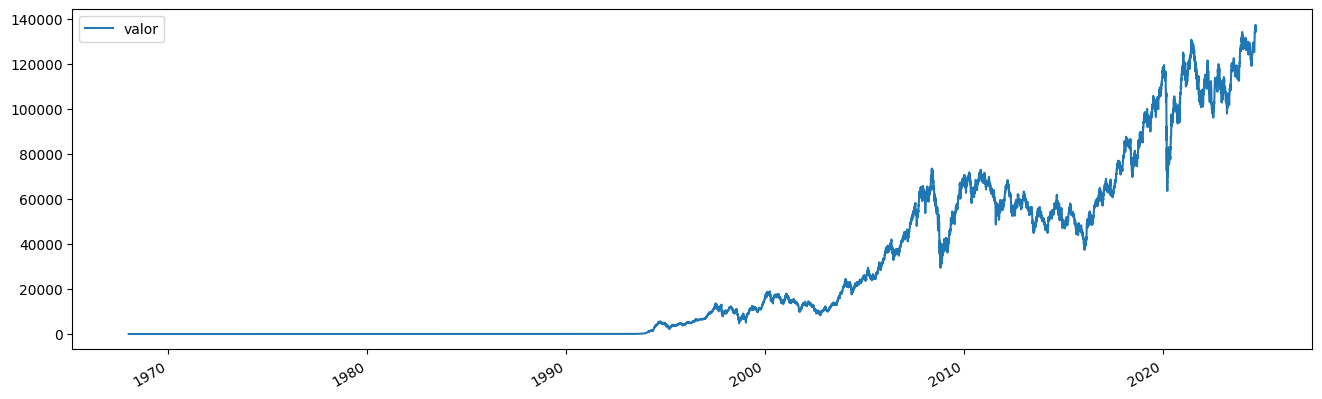

In [6]:
ibov.plot(figsize = (16,5))

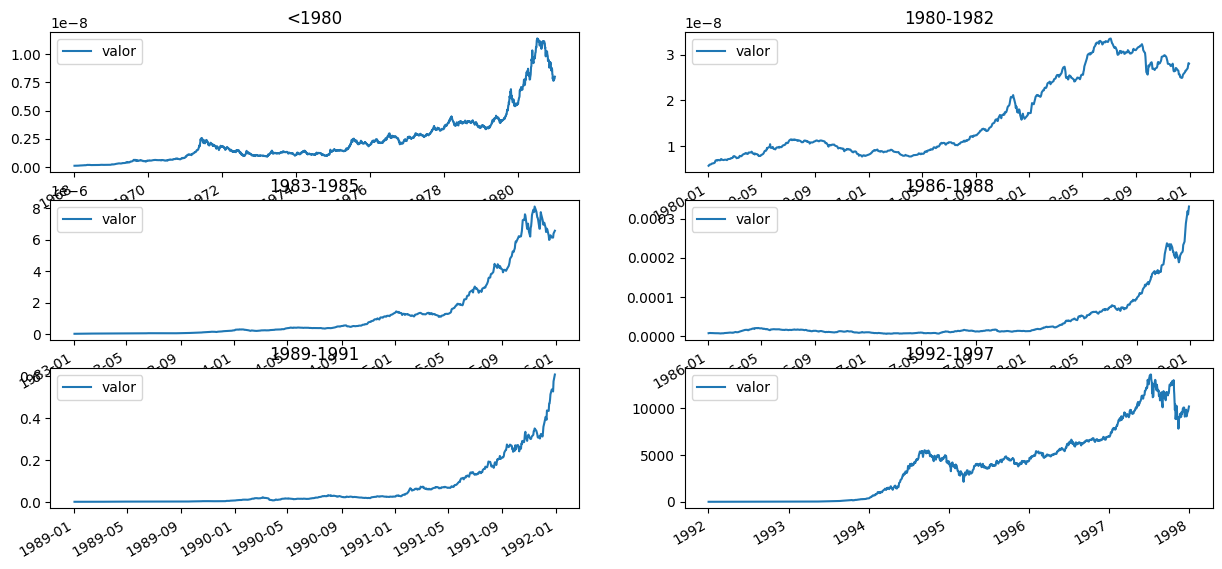

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2 ,figsize=(15,7))

ibov.loc[:'1980'].plot(ax=axes[0,0]); axes[0,0].set_title('<1980')
ibov.loc['1980':'1982'].plot(ax=axes[0,1]); axes[0,1].set_title('1980-1982')
ibov.loc['1983':'1985'].plot(ax=axes[1,0]); axes[1,0].set_title('1983-1985')
ibov.loc['1986':'1988'].plot(ax=axes[1,1]); axes[1,1].set_title('1986-1988')
ibov.loc['1989':'1991'].plot(ax=axes[2,0]); axes[2,0].set_title('1989-1991')
ibov.loc['1992':'1997'].plot(ax=axes[2,1]); axes[2,1].set_title('1992-1997');


In [8]:
mensal=pd.DataFrame()
mensal['valor']= ibov.valor.copy()
mensal.index = pd.to_datetime(mensal.index)
mensal = mensal.resample('M').ffill()#agg(lambda x: (x + 1).prod() - 1)
mensal['retornos']=mensal.pct_change()
mensal

,valor,retornos
1968-01-31,0.0000000001070,NaN
1968-02-29,0.0000000001230,0.1495327102804
1968-03-31,0.0000000001340,0.0894308943089
1968-04-30,0.0000000001640,0.2238805970149
1968-05-31,0.0000000001780,0.0853658536585
...,...,...
2024-05-31,"122,098.0000000000000",-0.0303834058639
2024-06-30,"123,907.0000000000000",0.0148159675015
2024-07-31,"127,652.0000000000000",0.0302242811141
2024-08-31,"136,004.0000000000000",0.0654278820543


In [9]:
returns_table = mensal.pivot_table(values='retornos', 
                               index=mensal.index.year, 
                               columns=mensal.index.month, 
                               aggfunc='mean')

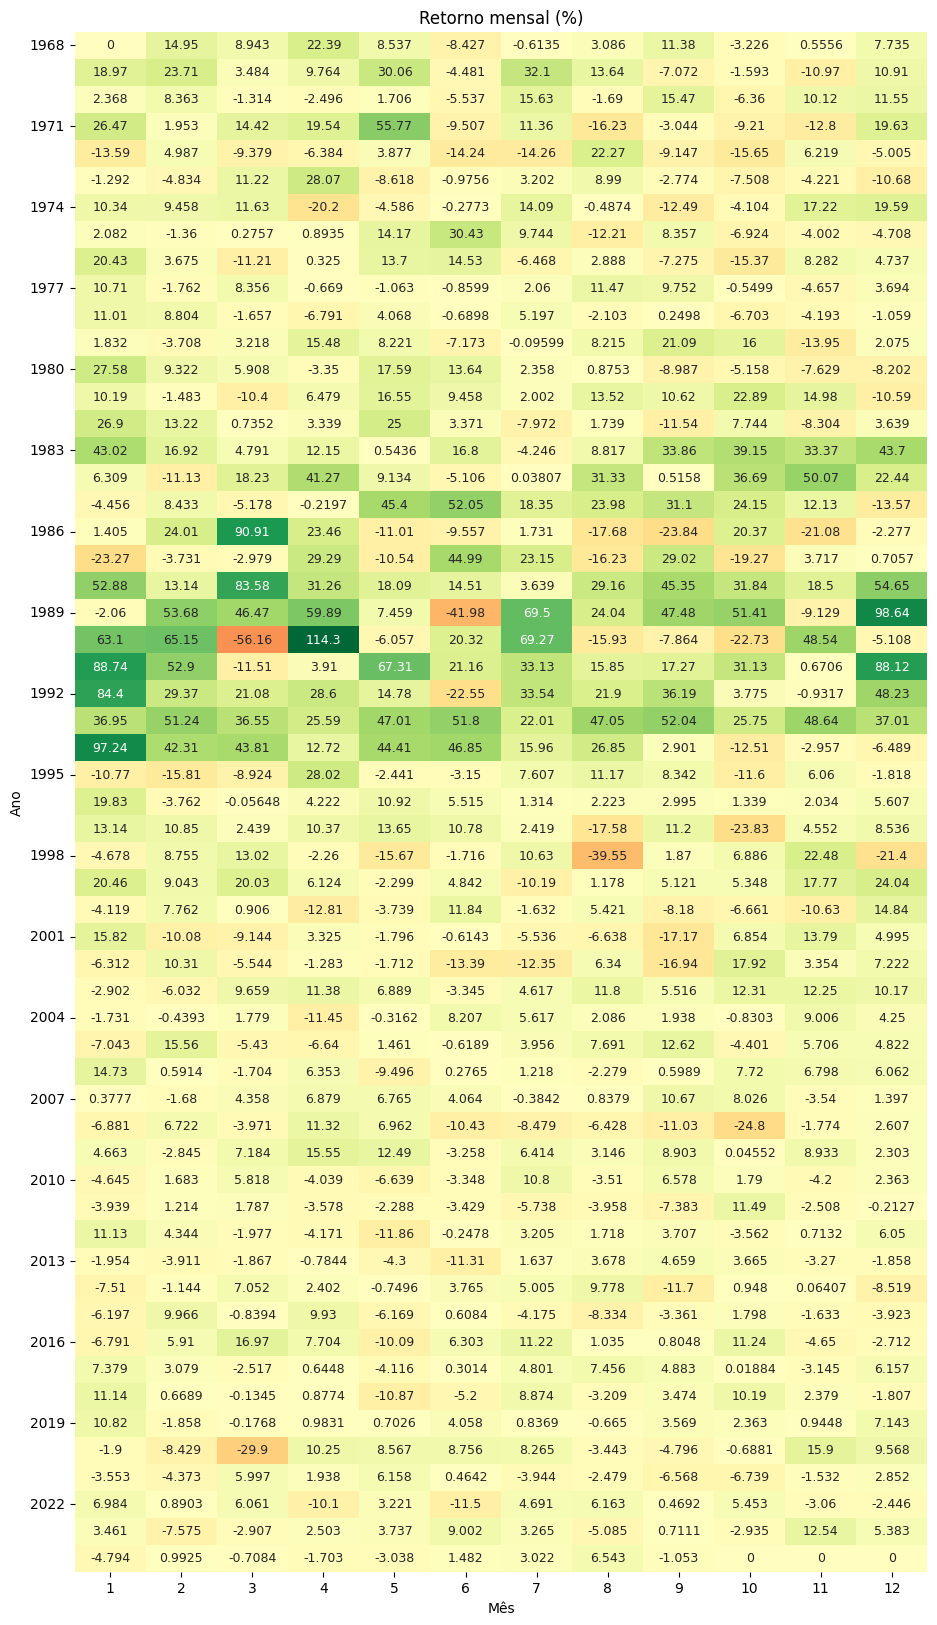

In [10]:
fig = plt.figure(1)

ax = plt.gca()

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax, fmt='.4g')
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(11,20)
plt.show()

<Axes: >

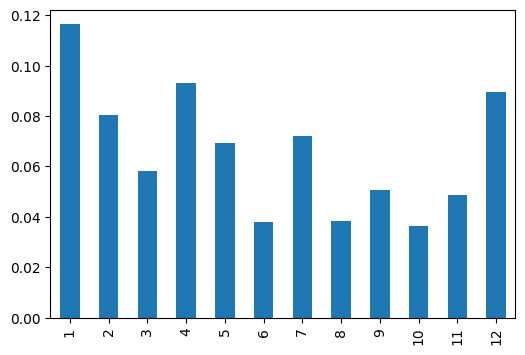

In [11]:
returns_table.mean().plot.bar(figsize=(6,4))

## usando o quantstats

In [12]:
# !pip install -q quantstats
import quantstats as qs


In [13]:
retorno=ibov.pct_change()
retorno.dropna(inplace=True)

In [14]:
retorno

,valor
1968-01-03,0.0000000000000
1968-01-04,-0.0100000000000
1968-01-05,-0.0202020202020
1968-01-08,0.0000000000000
1968-01-09,0.0103092783505
...,...
2024-09-02,-0.0075218375930
2024-09-03,-0.0046525066491
2024-09-04,0.0130849329751
2024-09-05,0.0028726554062


/home/yair/bin/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/yair/bin/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/yair/bin/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  retu

                           Strategy
-------------------------  ---------------------------
Start Period               1968-01-03
End Period                 2024-09-06
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          134,572,453,125,002,592.00%
CAGR﹪                     52.82%

Sharpe                     1.78
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.55
Sortino                    2.92
Smart Sortino              2.54
Sortino/√2                 2.07
Smart Sortino/√2           1.79
Omega                      1.4

Max Drawdown               -72.85%
Longest DD Days            3398
Volatility (ann.)          39.65%
Calmar                     0.73
Skew                       0.87
Kurtosis                   12.36

Expected Daily %           0.25%
Expected Monthly %         5.25%
Expected Yearly %          84.26%
Kelly Criterion            15.57%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.83%
Expected Shortfall (c

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,1986-04-28,1987-02-10,1988-02-01,645,-72.8450538399274,-70.5639088523142
2,1990-03-07,1990-03-29,1990-07-10,126,-68.6997251718817,-66.7864284214275
3,1997-07-10,1998-09-10,1999-11-25,869,-65.0363516192994,-57.1344642726004
4,1971-06-15,1973-03-19,1976-06-15,1828,-64.8711943793911,-62.6073380171741
5,1994-09-14,1995-03-09,1996-05-16,611,-61.1992072388686,-49.3174505095065


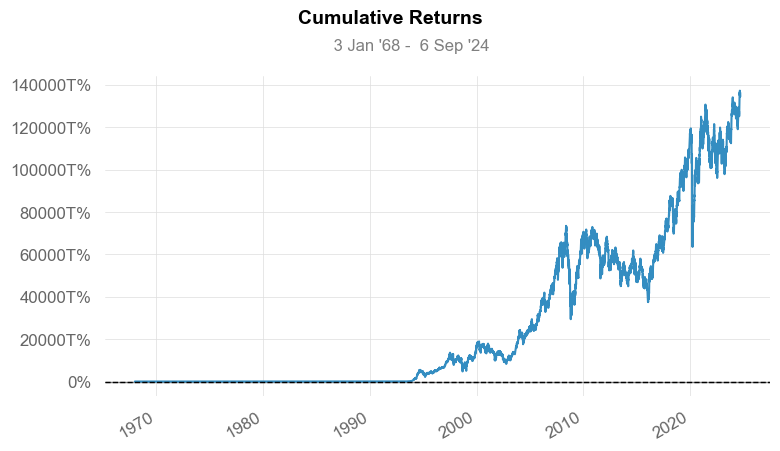

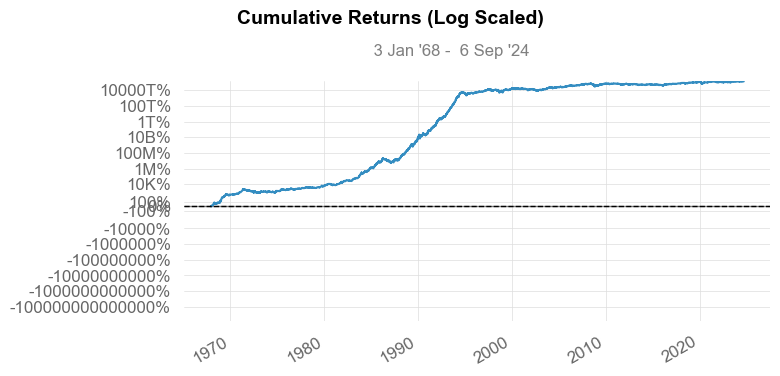

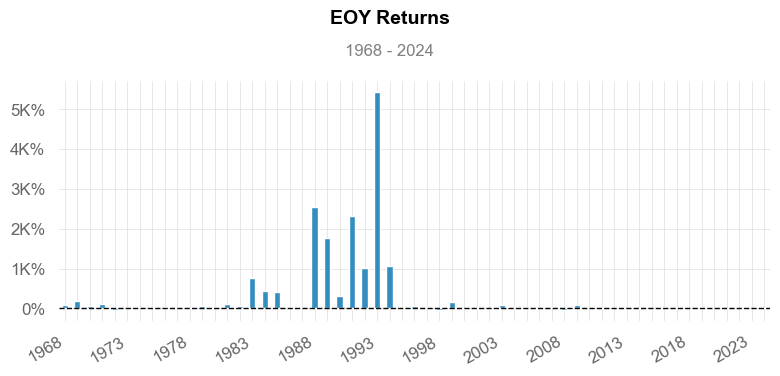

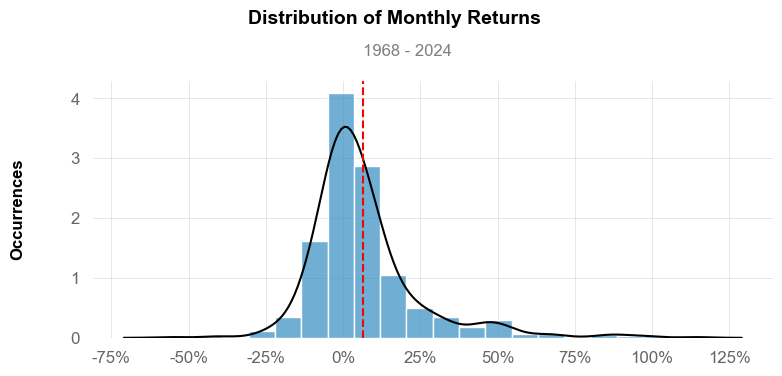

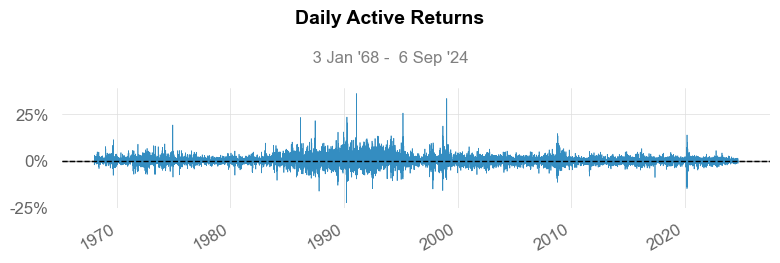

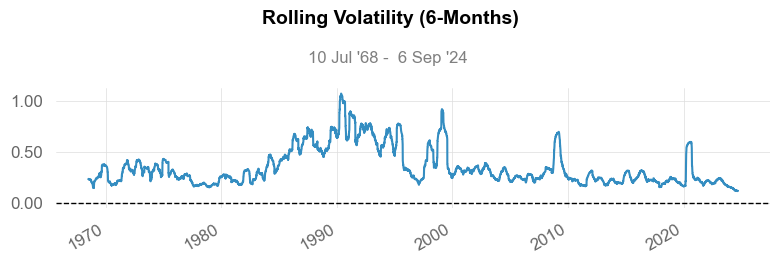

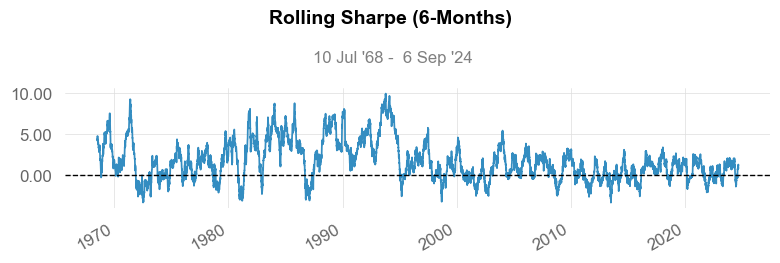

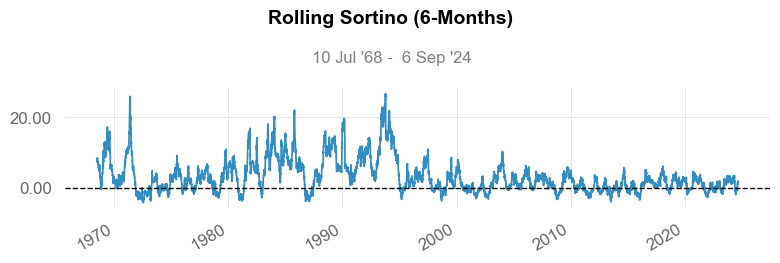

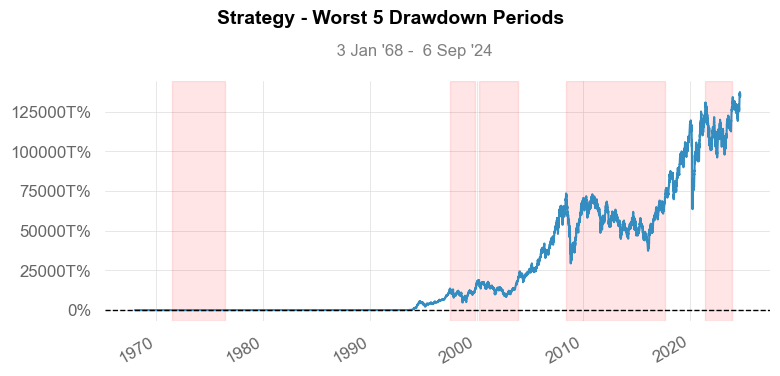

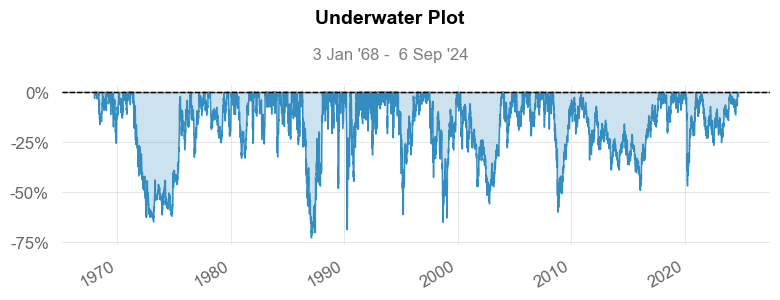

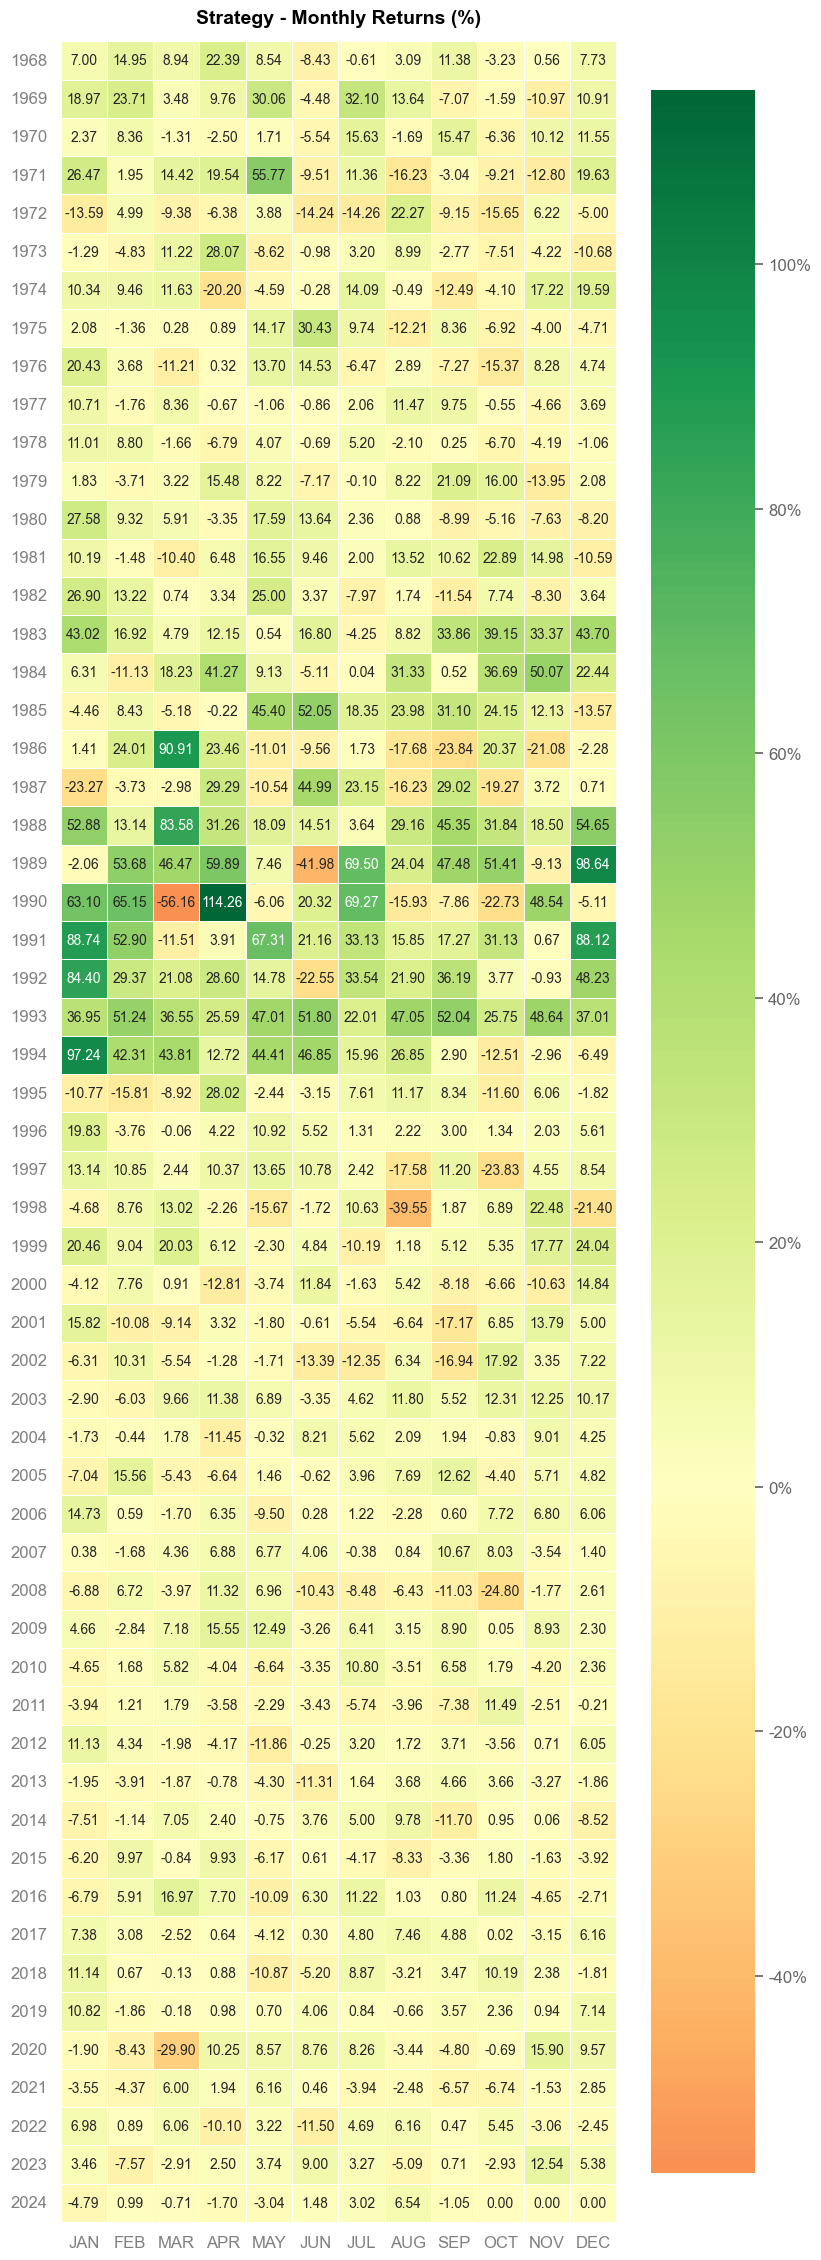

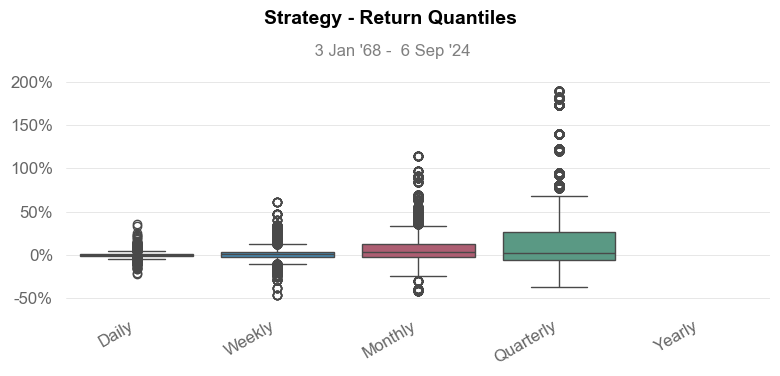

In [27]:
qs.reports.full(retorno.valor)

# escolhe um ano de 69 até 97 e monta data frame

os datos estão [nessa planilha](https://docs.google.com/spreadsheets/d/1pPBArWJlmt23PGRSRmQ40DzZPZNZKOJDkMsTGNUF6oM/edit?usp=sharing) (google sheet) que pode ser baixada [aqui, na b3](https://www.b3.com.br/data/files/A5/56/B2/36/245C5810F534EB48AC094EA8/IBOVDIA.zip) 

(tentei pegar direto a planilha com 
```
url2='https://github.com/BDonadelli/Codigos-em-financas/blob/main/IBOV_DIA_desde1969.XLS?raw=true'
db=pd.read_excel(url2) 
db
```
não deu certo ainda).

In [16]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://www.googleapis.com/auth/drive','https://www.googleapis.com/auth/spreadsheets']
jfile = 'carteira-328314-d38dcc8ee3e4.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(jfile, scope)
gc = gspread.authorize(credentials)

In [17]:
titulo_planilha = 'Planilha_ibov_69+'
planilha = gc.open(titulo_planilha)
sheets = planilha.worksheets()
sheetslist = [sheet.title for sheet in sheets]
sheetslist.reverse()

print(sheetslist)

['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997']


In [18]:
ano="1989"
worksheet = planilha.worksheet(ano)

In [19]:
from gspread_dataframe import get_as_dataframe

# pega só a perte relevante da planilha
df2 = get_as_dataframe(worksheet, parse_dates=True, 
                       usecols=range(0,13),
                       skiprows=range(34,1000), 
                       header= 1)

# renomeia as colunas 
colunas = {'PREGÃO': 'dia', 'JAN':'01','FEV':'02','MAR':'03','ABR':'04','MAIO':'05',
           'JUN':'06','JUL':'07','AGO':'08','SET':'09','OUT':'10','NOV':'11','DEZ':'12'}
df2.rename(columns=colunas, inplace=True)

# dia vem como float, pra tratar NaN ussa tipo 'Int64' - Nullable Integer Data Type.
df2['dia'] = df2['dia'].astype('Int64')

In [20]:
df2

,dia,01,02,03,04,05,06,07,08,09,10,11,12
0,1,NaN,0.0003385440000,0.0004988850000,NaN,NaN,0.0012927600000,NaN,0.0012225200000,0.0015413500000,NaN,0.0033751400000,0.0032742200000
1,2,0.0003237980000,0.0003566640000,0.0005136700000,NaN,0.0011673300000,0.0013162300000,NaN,0.0011965300000,NaN,0.0021490600000,NaN,NaN
2,3,0.0003191900000,0.0003781210000,0.0005396180000,0.0007639710000,0.0011068600000,NaN,0.0007112400000,0.0012470500000,NaN,0.0021704300000,0.0033537600000,NaN
3,4,0.0003391940000,NaN,NaN,0.0007926020000,0.0010211700000,NaN,0.0007219900000,0.0012976100000,0.0014885200000,0.0022712400000,NaN,0.0033175400000
4,5,0.0003402520000,NaN,NaN,0.0008100370000,0.0011307700000,0.0013060800000,0.0007622100000,NaN,0.0014682500000,0.0024636000000,NaN,0.0031687800000
5,6,0.0003418890000,NaN,0.0005534540000,0.0007623630000,NaN,0.0012750300000,0.0008323000000,NaN,0.0015351100000,0.0026681100000,0.0031639800000,0.0032575200000
6,7,NaN,NaN,0.0005261550000,0.0008009150000,NaN,0.0012058800000,0.0008860300000,0.0013495000000,NaN,NaN,0.0030810800000,0.0033596500000
7,8,NaN,NaN,0.0005498300000,NaN,0.0011491500000,0.0012073800000,NaN,0.0013743800000,0.0015897800000,NaN,0.0030457300000,0.0032061100000
8,9,0.0003408690000,0.0003970560000,0.0005711230000,NaN,0.0010692000000,0.0011387900000,NaN,0.0013524200000,NaN,NaN,0.0031869400000,NaN
9,10,0.0003567820000,0.0003984170000,0.0005561520000,0.0008285320000,0.0010310300000,NaN,0.0009185500000,0.0013573600000,NaN,0.0027828900000,0.0030578900000,NaN


In [21]:
# despivota a tabela 
df= pd.melt(df2, id_vars='dia', value_vars=['01','02','03','04','05','06','07','08','09','10','11','12'])
df.columns = ['dia','mes','valor']

#insere a coluna ano
df.insert(2, 'ano', ano)

# forma coluna com data e remove as outras
df.dia = df.dia.astype(str)
df['data'] = df[['ano', 'mes', 'dia']].agg('-'.join, axis=1)
df.drop(['dia','mes','ano'], axis='columns', inplace=True)

#joga fora os feriados e fins de semana
df = df.dropna()

# passa data pro indice
df['data']= pd.to_datetime(df['data'])
df = df.set_index('data')

df

,valor
data,
1989-01-02,0.0003237980000
1989-01-03,0.0003191900000
1989-01-04,0.0003391940000
1989-01-05,0.0003402520000
1989-01-06,0.0003418890000
...,...
1989-12-21,0.0051155800000
1989-12-22,0.0054734600000
1989-12-26,0.0061650400000


In [22]:
df['retornos'] = df.valor.pct_change()
df.dropna(inplace=True)

array([[<Axes: title={'center': 'valor'}>,
        <Axes: title={'center': 'retornos'}>]], dtype=object)

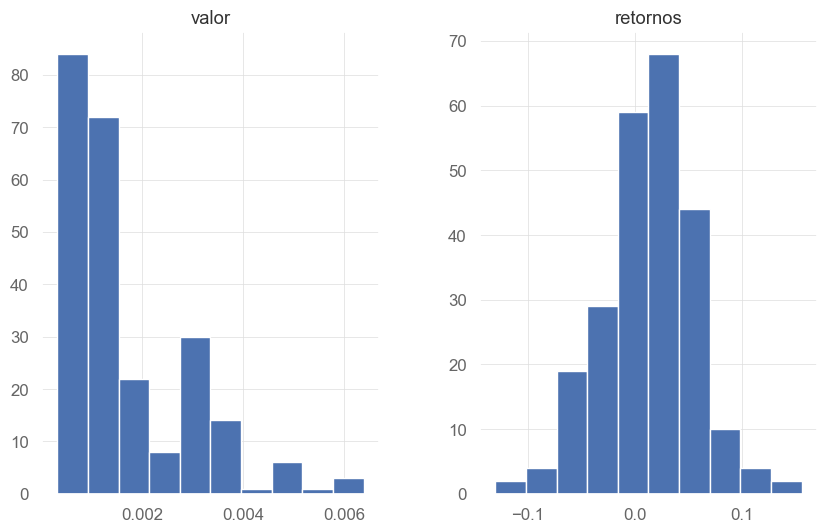

In [23]:
df.hist()